In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
try:
    # This library is our indicator that the required installs
    # need to be done.
    import pyvene as pv

except ModuleNotFoundError:
    !pip install git+https://github.com/stanfordnlp/pyvene.git

  Cloning https://github.com/stanfordnlp/pyvene.git to /tmp/pip-req-build-wrx9d3oi
  Running command git clone --filter=blob:none --quiet https://github.com/stanfordnlp/pyvene.git /tmp/pip-req-build-wrx9d3oi
  Resolved https://github.com/stanfordnlp/pyvene.git to commit 0d3f1f85065f87f849fd2cba060c69ecf69b65be
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.1 MB/s eta 0:00:00
  Created wheel for pyvene: filename=pyvene-0.1.6-py3-none-any.whl size=70623 sha256=43c38c475277f1702a5f24bc63661295ddf83bcf89f5d2d31370ba53c9766cd8
  Stored in directory: /tmp/pip-ephem-wheel-cache-85zchklc/wheels/ca/7a/8e/874d9cea554b263e6a71b8a2925cebd19ab132fd6c74946b6a
Successfully built pyvene
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Unins

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from datasets import load_dataset, Dataset
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import pyvene as pv
from tqdm.notebook import tqdm
import random
from collections import namedtuple
from copy import deepcopy

nnsight is not detected. Please install via 'pip install nnsight' for nnsight backend.


In [ ]:
%config InlineBackend.figure_formats = ['svg']
from plotnine import (
    ggplot,
    geom_tile,
    aes,
    theme,
    element_text,
    ggtitle, xlab, ylab
)
from plotnine.scales import scale_y_discrete, scale_fill_cmap

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Data preparation

In [ ]:
rooms_ds = load_dataset("tasksource/babi_nli", name='compound-coreference')
animals_ds = load_dataset("tasksource/babi_nli", name='basic-induction')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


README.md:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

(…)-00000-of-00001-eed73d0910fe58e5.parquet:   0%|          | 0.00/49.8k [00:00<?, ?B/s]

(…)-00000-of-00001-39630f61412e8dce.parquet:   0%|          | 0.00/29.4k [00:00<?, ?B/s]

(…)-00000-of-00001-af343c53d8191d62.parquet:   0%|          | 0.00/30.5k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/500 [00:00<?, ? examples/s]

(…)-00000-of-00001-e4f63ffe92e2fa74.parquet:   0%|          | 0.00/38.7k [00:00<?, ?B/s]

(…)-00000-of-00001-b4ca97bd31543496.parquet:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

(…)-00000-of-00001-1d9d7076b3cb6b66.parquet:   0%|          | 0.00/23.5k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
rooms_ds['train'].to_pandas().head(5)

,premise,hypothesis,label,idx
0,John and Daniel went to the office. After that...,John is in the kitchen.,1,0
1,Daniel and Sandra went to the office. Followin...,Sandra is in the office.,0,1
2,John and Sandra journeyed to the bedroom. Afte...,Daniel is in the kitchen.,0,2
3,John and Sandra travelled to the bathroom. Aft...,John is in the bathroom.,1,3
4,Sandra and Daniel went back to the kitchen. Af...,Mary is in the hallway.,0,4


In [ ]:
len(rooms_ds['train']), len(rooms_ds['validation']), len(rooms_ds['test'])

(1000, 500, 500)

In [ ]:
animals_ds['train'].to_pandas().head(3)

,premise,hypothesis,label,idx
0,Lily is a rhino. Lily is white. Bernhard is a ...,Greg is yellow.,1,0
1,Bernhard is a swan. Bernhard is green. Julius ...,Greg is green.,0,1
2,Greg is a rhino. Julius is a lion. Bernhard is...,Lily is white.,0,2


In [ ]:
len(animals_ds['train']), len(animals_ds['validation']), len(animals_ds['test'])

(1000, 500, 500)

In [ ]:
def prepare_last_as_label(data):
    data = deepcopy(data)
    for split in ['train', 'validation', 'test']:
        examples = data[split].filter(lambda x: x['label'] == 1)
        inputs = [ex['premise'] + " " + ex['hypothesis'].rsplit(" ", 1)[0] for ex in examples]
        labels = [ex['hypothesis'].rsplit(" ", 1)[-1].strip('.') for ex in examples]
        data[split] = Dataset.from_dict({'input': inputs, 'label': labels})
    return data

In [ ]:
rooms = prepare_last_as_label(rooms_ds)
animals = prepare_last_as_label(animals_ds)

Filter:   0%|          | 0/1000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/500 [00:00<?, ? examples/s]

Filter:   0%|          | 0/500 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/500 [00:00<?, ? examples/s]

Filter:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
rooms['train'][0]

{'input': 'John and Daniel went to the office. After that they went back to the kitchen. John is in the',
 'label': 'kitchen'}

In [ ]:
rooms['train'][2]

{'input': 'John and Mary moved to the bathroom. Then they travelled to the office. John and Mary went to the kitchen. Afterwards they went to the bedroom. John and Sandra moved to the bathroom. Following that they went back to the kitchen. Mary and Sandra went back to the garden. Following that they travelled to the hallway. Sandra is in the',
 'label': 'hallway'}

In [ ]:
animals['train'][0]

{'input': 'Lily is a rhino. Lily is white. Bernhard is a swan. Brian is a lion. Bernhard is white. Julius is a rhino. Julius is white. Brian is yellow. Greg is a lion. Greg is',
 'label': 'yellow'}

In [ ]:
animals['train'][21]

{'input': 'Greg is a swan. Bernhard is a frog. Bernhard is yellow. Julius is a lion. Greg is green. Julius is green. Lily is a swan. Lily is yellow. Brian is a frog. Brian is',
 'label': 'yellow'}

### Prepare training examples


In [ ]:
rooms_list = [
    "bathroom", "bedroom", "garden", "kitchen", "livingroom", "forest",
    "office", "garage", "hallway", "library", "basement", "attic", "balcony",
    "cellar", "study", "diningroom", "playroom"]

colors_list = [
    "red", "blue", "green", "yellow", "purple", "orange", "pink",
    "brown", "black", "white", "gray", "navy",
    "gold", "silver", "cyan", "rose"
]


In [ ]:
Example = namedtuple("Example", ["base", "src", "base_label", "src_label"])
def sample_example_rooms(tokenizer):
    base_label = random.choice(rooms_list)
    src_label = random.choice([room for room in rooms_list if base_label != room])
    print(f'John and Daniel went to the office. After that they went back to the {base_label}. John is in the, label: {base_label}')
    print(f'John and Daniel went to the office. After that they went back to the {src_label}. John is in the, label: {src_label}')
    base = tokenizer(f'John and Daniel went to the office. After that they went back to the {base_label}. John is in the', return_tensors="pt")
    src = tokenizer(f'John and Daniel went to the office. After that they went back to the {src_label}. John is in the', return_tensors="pt")
    base_label = tokenizer.encode(" " + base_label)[0]
    src_label = tokenizer.encode(" " + src_label)[0]

    return Example(base, src, base_label, src_label)

In [ ]:
Example = namedtuple("Example", ["base", "src", "base_label", "src_label"])
def sample_example_rooms_2(tokenizer):
    base_label = random.choice(rooms_list)
    src_label = random.choice([room for room in rooms_list if base_label != room])
    print(f'John and Daniel went to the {base_label}. Before that they were in the office. John is in the, label: {base_label}')
    print(f'John and Daniel went to the {src_label}. Before that they were in the office. John is in the, label: {src_label}')

    base = tokenizer(f'John and Daniel went to the {base_label}. Before that they were in the office. John is in the', return_tensors="pt")
    src = tokenizer(f'John and Daniel went to the {src_label}. Before that they were in the office. John is in the', return_tensors="pt")
    base_label = tokenizer.encode(" " + base_label)[0]
    src_label = tokenizer.encode(" " + src_label)[0]

    return Example(base, src, base_label, src_label)

In [ ]:
Example = namedtuple("Example", ["base", "src", "base_label", "src_label"])
def sample_example_animals(tokenizer):
    base_label = random.choice(colors_list)
    src_label = random.choice([color for color in colors_list if base_label != color])
    print(f'Greg is a lion. Bernard is a frog. Bernard is {base_label}. Greg is green. Lily is a lion. Lily is yellow. Brian is a frog. Brian is {base_label}')
    print(f'Greg is a lion. Bernard is a frog. Bernard is {src_label}. Greg is green. Lily is a lion. Lily is yellow. Brian is a frog. Brian is {src_label}')
    base = tokenizer(f'Greg is a lion. Bernard is a frog. Bernard is {base_label}. Greg is green. Lily is a lion. Lily is yellow. Brian is a frog. Brian is', return_tensors="pt")
    src = tokenizer(f'Greg is a lion. Bernard is a frog. Bernard is {src_label}. Greg is green. Lily is a lion. Lily is yellow. Brian is a frog. Brian is', return_tensors="pt")
    base_label = tokenizer.encode(" " + base_label)[0]
    src_label = tokenizer.encode(" " + src_label)[0]

    return Example(base, src, base_label, src_label)

In [ ]:
sample_example_rooms(tokenizer=tokenizer)
print()
sample_example_rooms(tokenizer=tokenizer)
print()

John and Daniel went to the office. After that they went back to the kitchen. John is in the, label: kitchen
John and Daniel went to the office. After that they went back to the forest. John is in the, label: forest

John and Daniel went to the office. After that they went back to the cellar. John is in the, label: cellar
John and Daniel went to the office. After that they went back to the attic. John is in the, label: attic



In [ ]:
sample_example_rooms_2(tokenizer=tokenizer)
print()
sample_example_rooms_2(tokenizer=tokenizer)
print()

John and Daniel went to the garden. Before that they were in the office. John is in the, label: garden
John and Daniel went to the basement. Before that they were in the office. John is in the, label: basement

John and Daniel went to the livingroom. Before that they were in the office. John is in the, label: livingroom
John and Daniel went to the diningroom. Before that they were in the office. John is in the, label: diningroom



In [ ]:
base = sample_example_animals(tokenizer=tokenizer)[0]
tokens = tokenizer.convert_ids_to_tokens(base['input_ids'][0])
num_tokens = len(tokens)

# Print the results
print("Number of tokens:", num_tokens)
print("Tokens:", tokens)
print()
sample_example_animals(tokenizer=tokenizer)
print()

Greg is a lion. Bernard is a frog. Bernard is green. Greg is green. Lily is a lion. Lily is yellow. Brian is a frog. Brian is green
Greg is a lion. Bernard is a frog. Bernard is silver. Greg is green. Lily is a lion. Lily is yellow. Brian is a frog. Brian is silver
Number of tokens: 34
Tokens: ['Greg', 'Ġis', 'Ġa', 'Ġlion', '.', 'ĠBernard', 'Ġis', 'Ġa', 'Ġfrog', '.', 'ĠBernard', 'Ġis', 'Ġgreen', '.', 'ĠGreg', 'Ġis', 'Ġgreen', '.', 'ĠLily', 'Ġis', 'Ġa', 'Ġlion', '.', 'ĠLily', 'Ġis', 'Ġyellow', '.', 'ĠBrian', 'Ġis', 'Ġa', 'Ġfrog', '.', 'ĠBrian', 'Ġis']

Greg is a lion. Bernard is a frog. Bernard is yellow. Greg is green. Lily is a lion. Lily is yellow. Brian is a frog. Brian is yellow
Greg is a lion. Bernard is a frog. Bernard is gray. Greg is green. Lily is a lion. Lily is yellow. Brian is a frog. Brian is gray



In [ ]:
def generate_n_doable_examples(n, sampler, model, tokenizer):
    examples = []
    iterator = tqdm(range(n))
    i=0
    while len(examples) < n:
        ex = sampler(tokenizer)
        for k, v in ex.base.items():
            if v is not None and isinstance(v, torch.Tensor):
                ex.base[k] = v.to(model.device)
        for k, v in ex.src.items():
            if v is not None and isinstance(v, torch.Tensor):
                ex.src[k] = v.to(model.device)
        logits_base = model(**ex.base).logits[0, -1]
        logits_src = model(**ex.src).logits[0, -1]
        if (
            logits_base[ex.base_label] > logits_base[ex.src_label]
            and logits_src[ex.src_label] > logits_src[ex.base_label]
        ):
            examples.append(ex)
            iterator.update(1)
        i+=1
    return examples

## Prepare models

In [ ]:
model = "EleutherAI/pythia-14M" # "EleutherAI/pythia-6.9B"
tokenizer = AutoTokenizer.from_pretrained(model)
tokenizer.pad_token = tokenizer.eos_token
gpt = AutoModelForCausalLM.from_pretrained(
    model,
    revision="main",
    torch_dtype=torch.bfloat16 if model == "EleutherAI/pythia-6.9b" else torch.float32,
).to(device)

tokenizer_config.json:   0%|          | 0.00/264 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/595 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/53.3M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [ ]:
model = "EleutherAI/pythia-70m" # "EleutherAI/pythia-6.9B"
tokenizer = AutoTokenizer.from_pretrained(model)
tokenizer.pad_token = tokenizer.eos_token
gpt = AutoModelForCausalLM.from_pretrained(
    model,
    revision="main",
    torch_dtype=torch.bfloat16 if model == "EleutherAI/pythia-6.9b" else torch.float32,
).to(device)

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/166M [00:00<?, ?B/s]

The `GPTNeoXSdpaAttention` class is deprecated in favor of simply modifying the `config._attn_implementation`attribute of the `GPTNeoXAttention` class! It will be removed in v4.48


In [ ]:
def probing_config(intervention_site, layer):
    """Generate intervention config."""

    # init
    config = pv.IntervenableConfig([{
        "layer": layer,
        "component": intervention_site,
        "intervention_type": pv.CollectIntervention,
    }])
    return config

In [ ]:
def train_and_eval(label_map, model, trainset, evalset, number_of_positions, file_path):
    # intervention settings
    stats = []
    num_layers = gpt.config.num_hidden_layers

    # 344 = " he", 703 = " she"
    label_mapping = label_map
    print(label_mapping)
    # loop over layers and positions
    with torch.no_grad():
        for layer in range(num_layers):
            for position in range(number_of_positions):
                print(f"layer: {layer}, position: {position}")

                # set up intervenable model
                config = probing_config("block_output", layer)
                intervenable = pv.IntervenableModel(config, gpt)
                intervenable.set_device(device)
                intervenable.disable_model_gradients()

                # training loop
                activations, labels = [], []
                iterator = tqdm(trainset)
                for example in iterator:
                    # forward pass
                    base_outputs, _ = intervenable(
                        example.base,
                        unit_locations={"base": position},
                    )
                    base_activations = base_outputs[1][0]

                    src_outputs, _ = intervenable(
                        example.src,
                        unit_locations={"base": position},
                    )
                    src_activations = src_outputs[1][0]

                    # collect activation
                    activations.extend(
                        [base_activations.detach()[0].cpu().numpy(), src_activations.detach()[0].cpu().numpy()]
                    )
                    labels.extend([example.base_label, example.src_label])
                labels = [label_mapping[label] for label in labels]

                # train logistic regression
                lr = LogisticRegression(random_state=42, max_iter=1000).fit(
                    activations, labels
                )

                # eval
                activations, labels = [], []
                iterator = tqdm(evalset)
                for example in iterator:
                    # forward pass
                    base_outputs, _ = intervenable(
                        example.base,
                        unit_locations={"base": position},
                    )
                    base_activations = base_outputs[1][0]

                    src_outputs, _ = intervenable(
                        example.src,
                        unit_locations={"base": position},
                    )
                    src_activations = src_outputs[1][0]

                    # collect activation
                    activations.extend(
                        [base_activations.detach()[0].cpu().numpy(), src_activations.detach()[0].cpu().numpy()]
                    )
                    labels.extend([example.base_label, example.src_label])
                labels = [label_mapping[label] for label in labels]

                # stats
                acc = lr.score(activations, labels)
                f1 = f1_score(labels, lr.predict(activations), average="macro")
                stats.append({"layer": layer, "position": position, "acc": acc, "f1": f1})
                print(f"acc: {acc:.3%}, f1: {f1:.3f}")
    df = pd.DataFrame(stats)
    df.to_csv(file_path)

In [ ]:
def plot_results(stats_df, title, custom_labels):

    df = pd.DataFrame()
    df["layer"] = stats_df["layer"].astype(int)
    df["pos"] = stats_df["position"].astype("category")
    df["ACC"] = stats_df["acc"].astype(float)
    df["F1"] = stats_df['f1'].astype(float)

    df['custom_label'] = df["pos"].apply(lambda x: custom_labels[x])

    plot = (
        ggplot(df, aes(x="layer", y="pos", fill="ACC"))
        + geom_tile()
        + scale_fill_cmap("Reds") + xlab("layers")
        + scale_y_discrete(labels=custom_labels)
        + theme(figure_size=(4, 6)) + ylab("")
        + theme(axis_text_y  = element_text(angle = 0, hjust = 1))
        + ggtitle(f"Trained Linear Probe ({title})")
    )
    display(plot)
    plot = (
        ggplot(df, aes(x="layer", y="pos", fill="ACC"))
        + geom_tile()
        + scale_fill_cmap("Purples") + xlab("layers")
        + scale_y_discrete(labels=custom_labels)
        + theme(figure_size=(4, 6)) + ylab("")
        + theme(axis_text_y  = element_text(angle = 0, hjust = 1))
        + ggtitle(f"Trained Linear Probe ({title})")
    )
    display(plot)

## Rooms

### pythia 14M

In [ ]:
total_steps = 100

# get labels
trainset = generate_n_doable_examples(total_steps, sample_example_rooms, gpt, tokenizer)
evalset = generate_n_doable_examples(20, sample_example_rooms, gpt, tokenizer)

In [ ]:
label_mapping = {tokenizer.encode(" " + room)[0]: room for room in rooms_list}

train_and_eval(label_mapping, model, trainset, evalset, 21, "pyvene_gender_probe-after-pythia14M.csv")

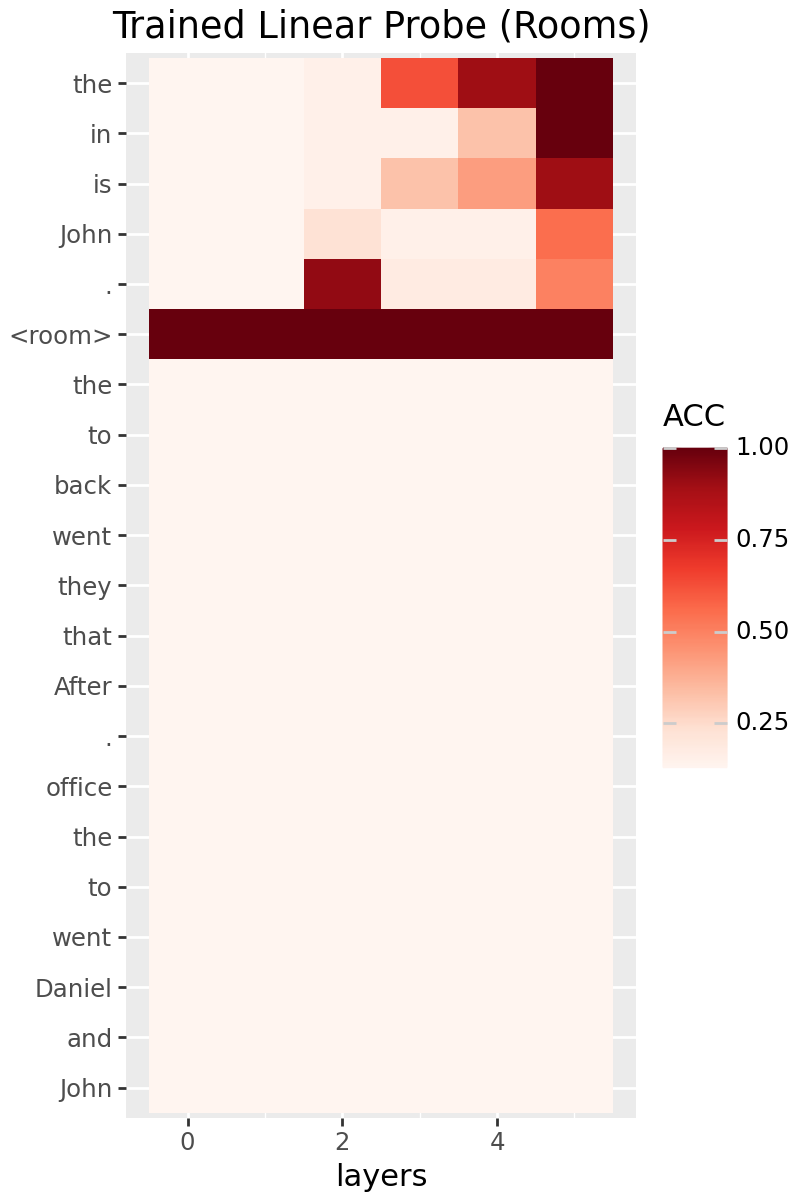

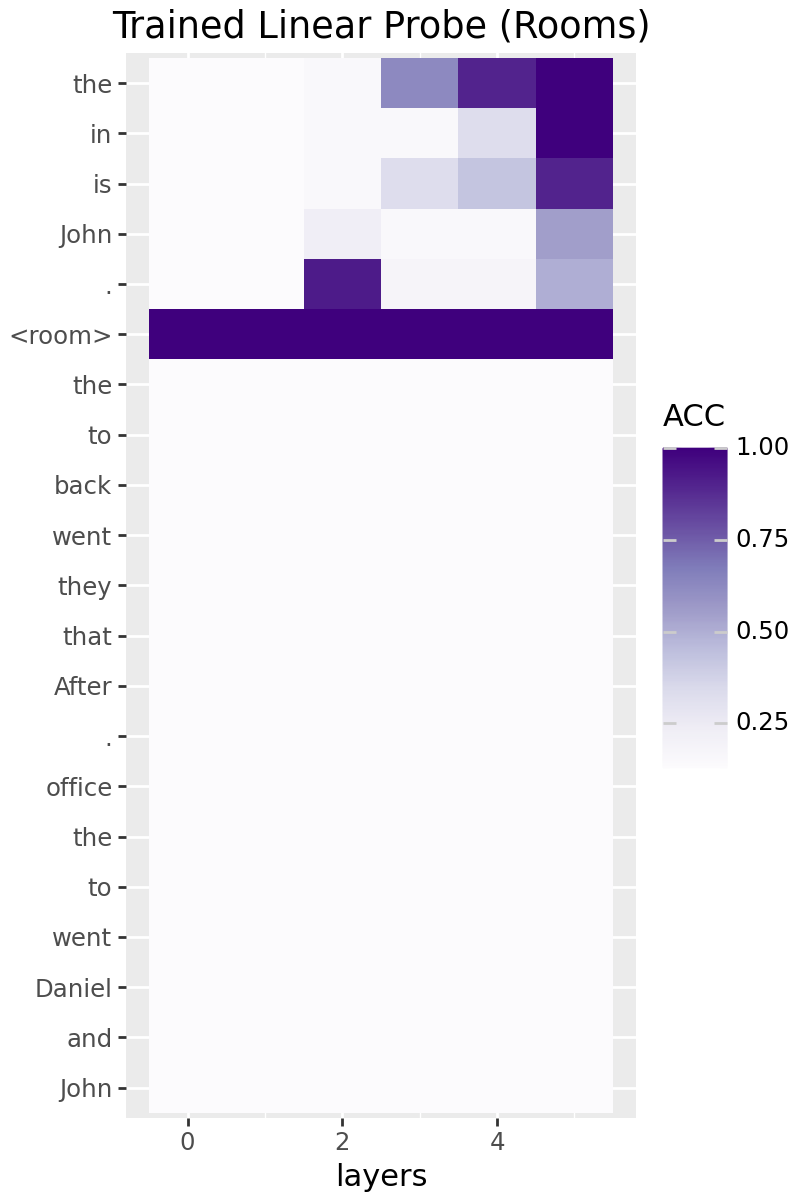

In [ ]:
custom_labels = ['John', 'and', 'Daniel', 'went', 'to', 'the', 'office', '.', 'After', 'that', 'they', 'went', 'back', 'to', 'the', '<room>', '.', 'John', 'is', 'in', 'the']
plot_results(pd.read_csv("/content/pyvene_gender_probe-after-pythia14M.csv"), "Rooms", custom_labels)

### pythia 70M

In [ ]:
total_steps = 100

# get labels
trainset = generate_n_doable_examples(total_steps, sample_example_rooms, gpt, tokenizer)
evalset = generate_n_doable_examples(20, sample_example_rooms, gpt, tokenizer)


In [ ]:
label_mapping = {tokenizer.encode(" " + room)[0]: room for room in rooms_list}

train_and_eval(label_mapping, model, trainset, evalset, 20, "pyvene_gender_probe-after-pythia70m.csv")

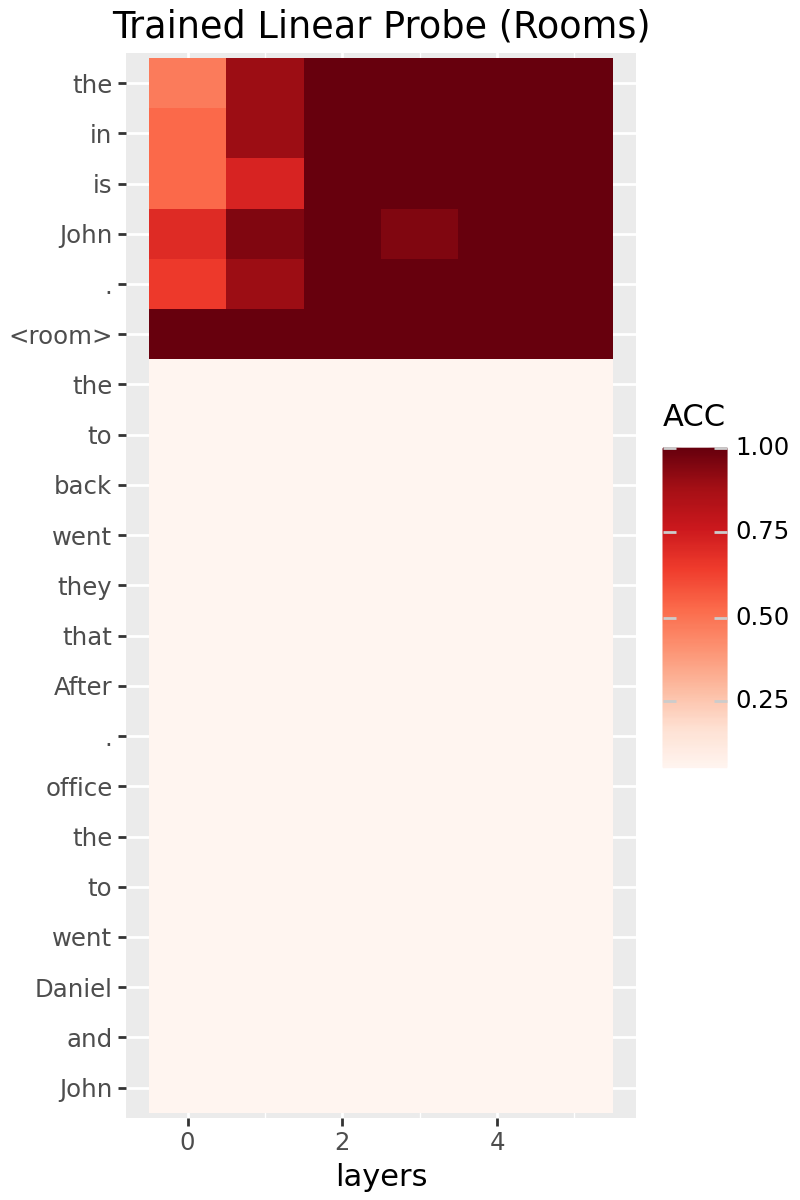

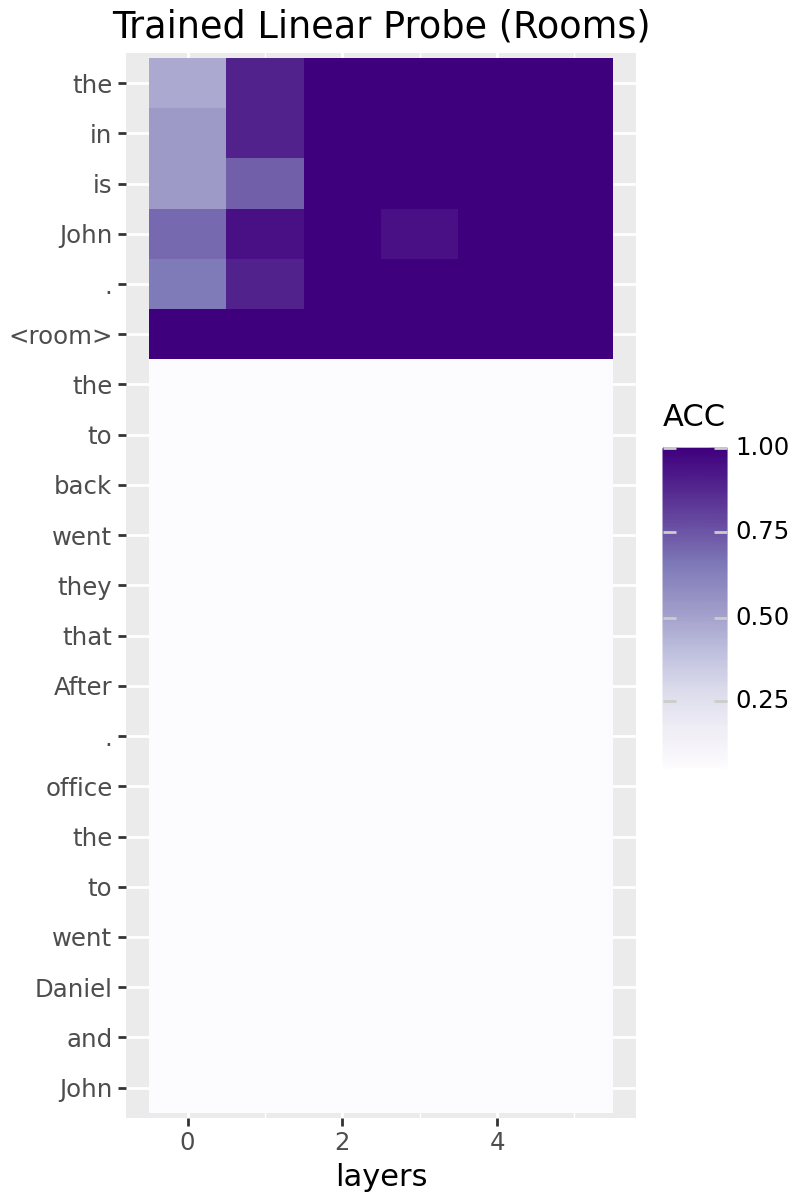

In [ ]:
custom_labels = ['John', 'and', 'Daniel', 'went', 'to', 'the', 'office', '.', 'After', 'that', 'they', 'went', 'back', 'to', 'the', '<room>', '.', 'John', 'is', 'in', 'the']
plot_results(pd.read_csv("/content/pyvene_gender_probe-after-pythia70m.csv"), "Rooms", custom_labels)

### pythia 14M

In [ ]:
total_steps = 100

# get labels
trainset = generate_n_doable_examples(total_steps, sample_example_rooms_2, gpt, tokenizer)
evalset = generate_n_doable_examples(20, sample_example_rooms_2, gpt, tokenizer)

In [ ]:
label_mapping = {tokenizer.encode(" " + room)[0]: room for room in rooms_list}

train_and_eval(label_mapping, model, trainset, evalset, 20, "pyvene_gender_probe-before-pythia14M.csv")

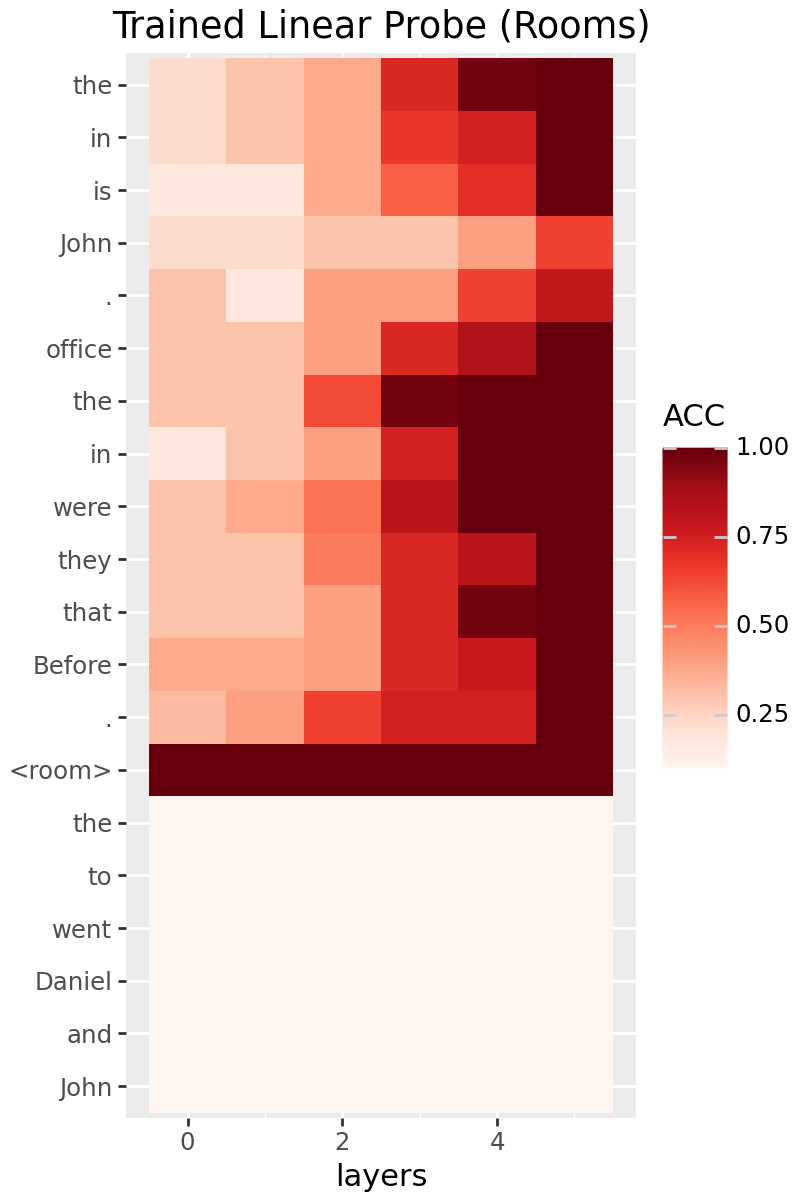

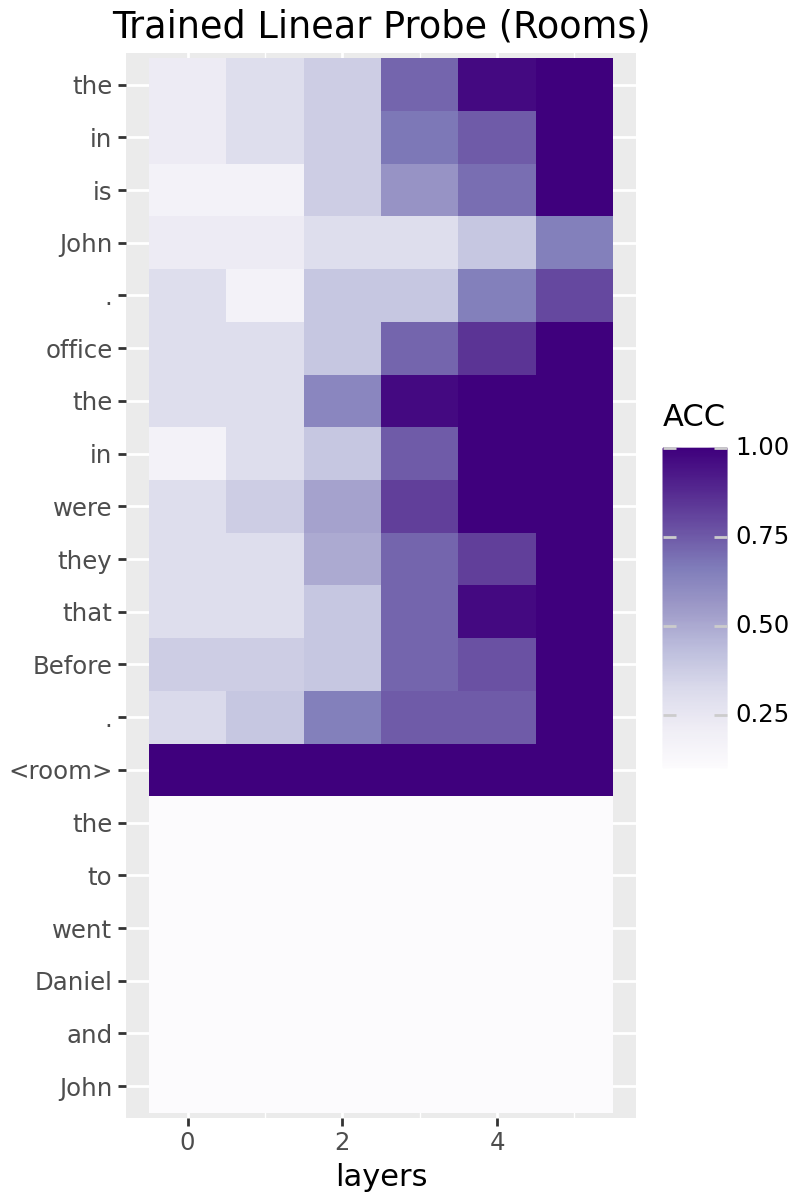

In [ ]:
custom_labels = ['John', 'and', 'Daniel', 'went', 'to', 'the', '<room>', '.', 'Before', 'that', 'they', 'were', 'in', 'the', 'office', '.', 'John', 'is', 'in', 'the']
plot_results(pd.read_csv("/content/pyvene_gender_probe-before-pythia14M.csv"), "Rooms", custom_labels)

### pythia 70M

In [ ]:
total_steps = 100

# get labels
trainset = generate_n_doable_examples(total_steps, sample_example_rooms_2, gpt, tokenizer)
evalset = generate_n_doable_examples(20, sample_example_rooms_2, gpt, tokenizer)

In [ ]:
label_mapping = {tokenizer.encode(" " + room)[0]: room for room in rooms_list}

train_and_eval(label_mapping, model, trainset, evalset, 20, "pyvene_gender_probe-before-pythia70m.csv")

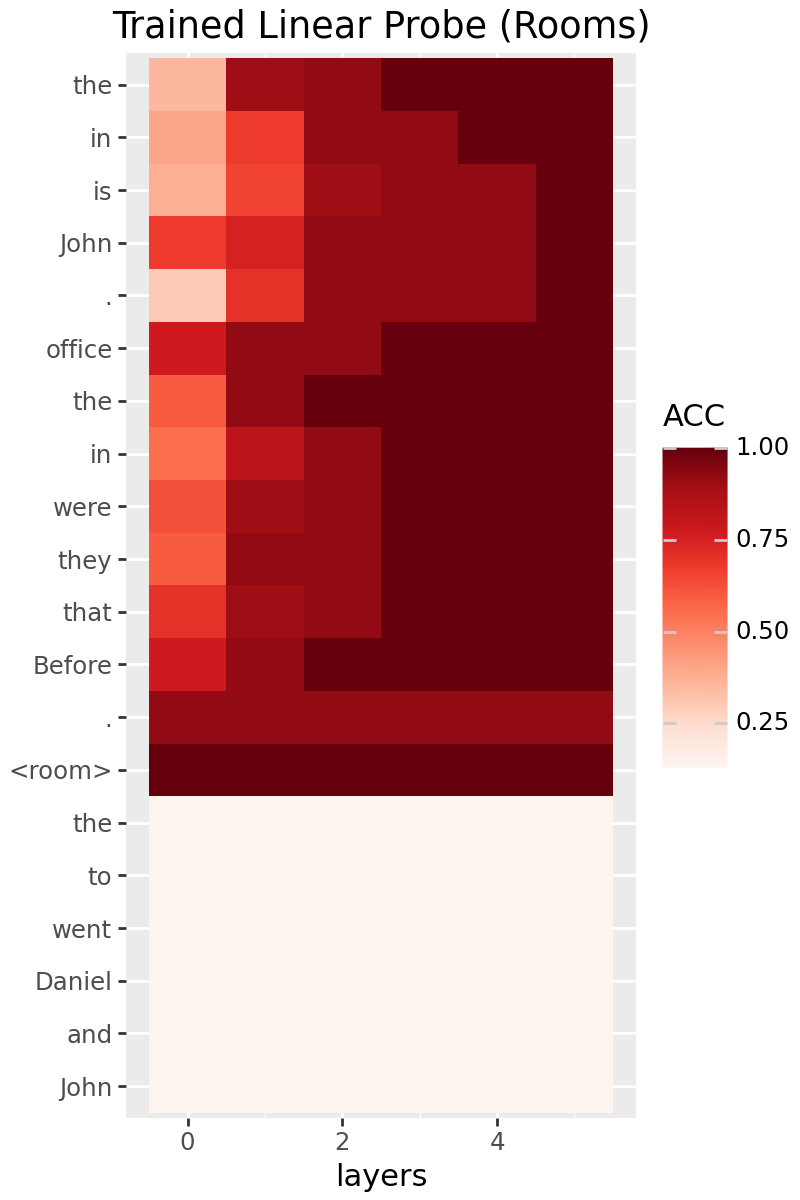

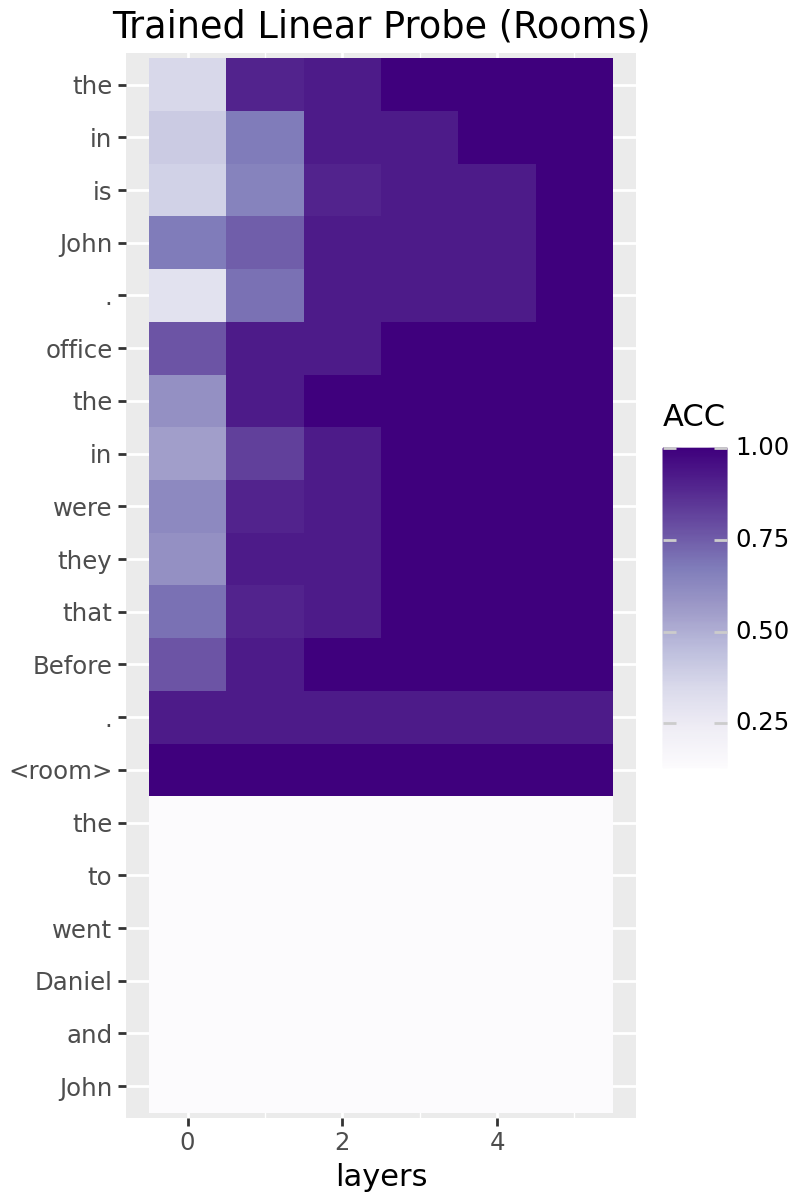

In [ ]:
custom_labels = ['John', 'and', 'Daniel', 'went', 'to', 'the', '<room>', '.', 'Before', 'that', 'they', 'were', 'in', 'the', 'office', '.', 'John', 'is', 'in', 'the']
plot_results(pd.read_csv("/content/pyvene_gender_probe-before-pythia70m.csv"), "Rooms", custom_labels)

## Animals colors

### pythia 14M

In [ ]:
total_steps = 100

# get labels
trainset = generate_n_doable_examples(total_steps, sample_example_animals, gpt, tokenizer)
evalset = generate_n_doable_examples(20, sample_example_animals, gpt, tokenizer)

In [ ]:
label_mapping = {tokenizer.encode(" " + color)[0]: color for color in colors_list}

train_and_eval(label_mapping, model, trainset, evalset, 34, "pyvene_gender_probe-color-pythia14M.csv")

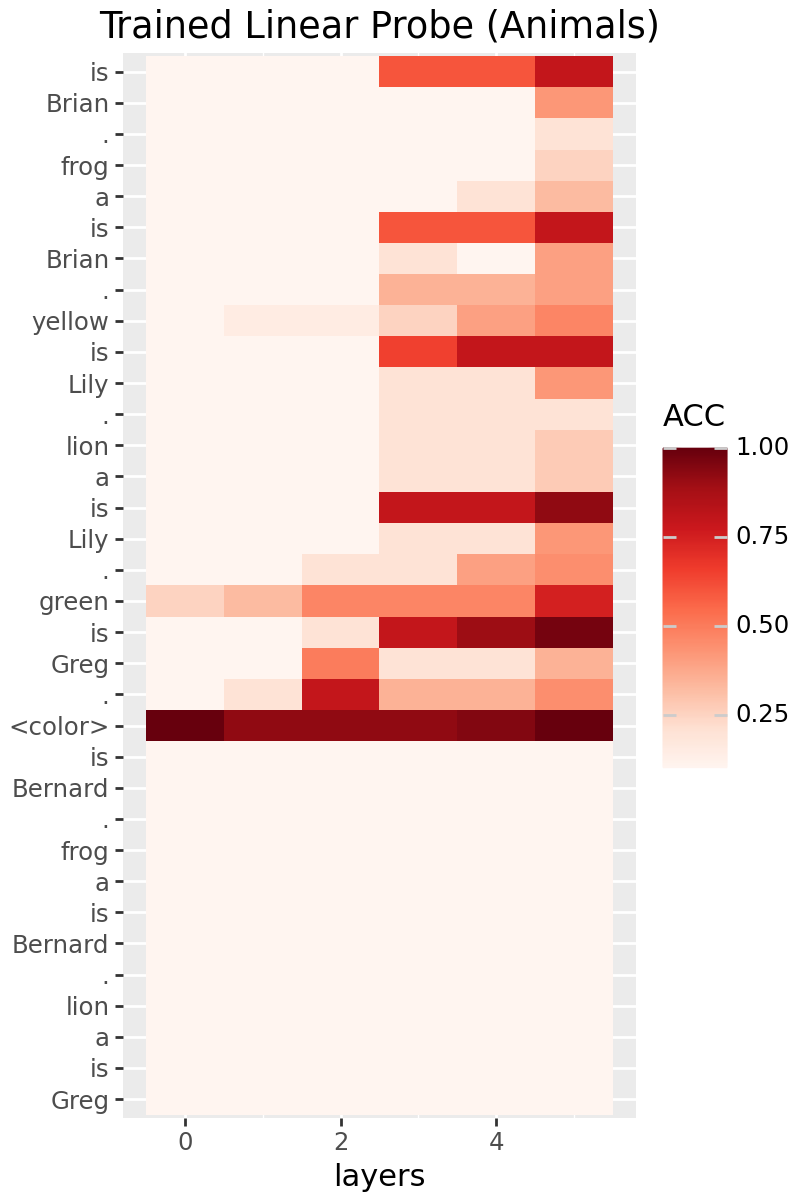

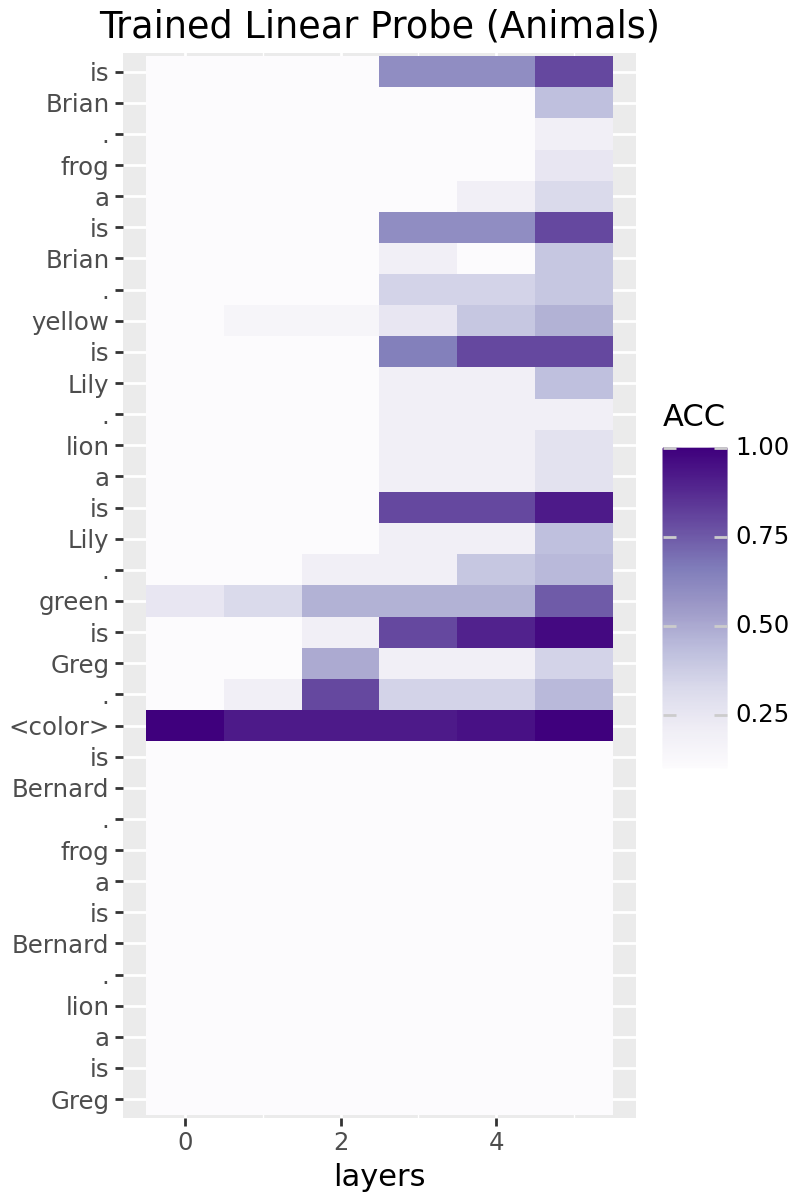

In [ ]:
custom_labels = ['Greg', 'is', 'a', 'lion', '.', 'Bernard', 'is', 'a', 'frog', '.', 'Bernard', 'is', '<color>', '.', 'Greg', 'is', 'green', '.', 'Lily', 'is', 'a', 'lion', '.', 'Lily', 'is', 'yellow', '.', 'Brian', 'is', 'a', 'frog', '.', 'Brian', 'is']
plot_results(pd.read_csv("/content/pyvene_gender_probe-color-pythia14M.csv"), "Animals", custom_labels)

### pythia 70M


In [ ]:
total_steps = 100

# get labels
trainset = generate_n_doable_examples(total_steps, sample_example_animals, gpt, tokenizer)
evalset = generate_n_doable_examples(20, sample_example_animals, gpt, tokenizer)

In [ ]:
label_mapping = {tokenizer.encode(" " + color)[0]: color for color in colors_list}

train_and_eval(label_mapping, model, trainset, evalset, 34, "pyvene_gender_probe-color-pythia70M.csv")

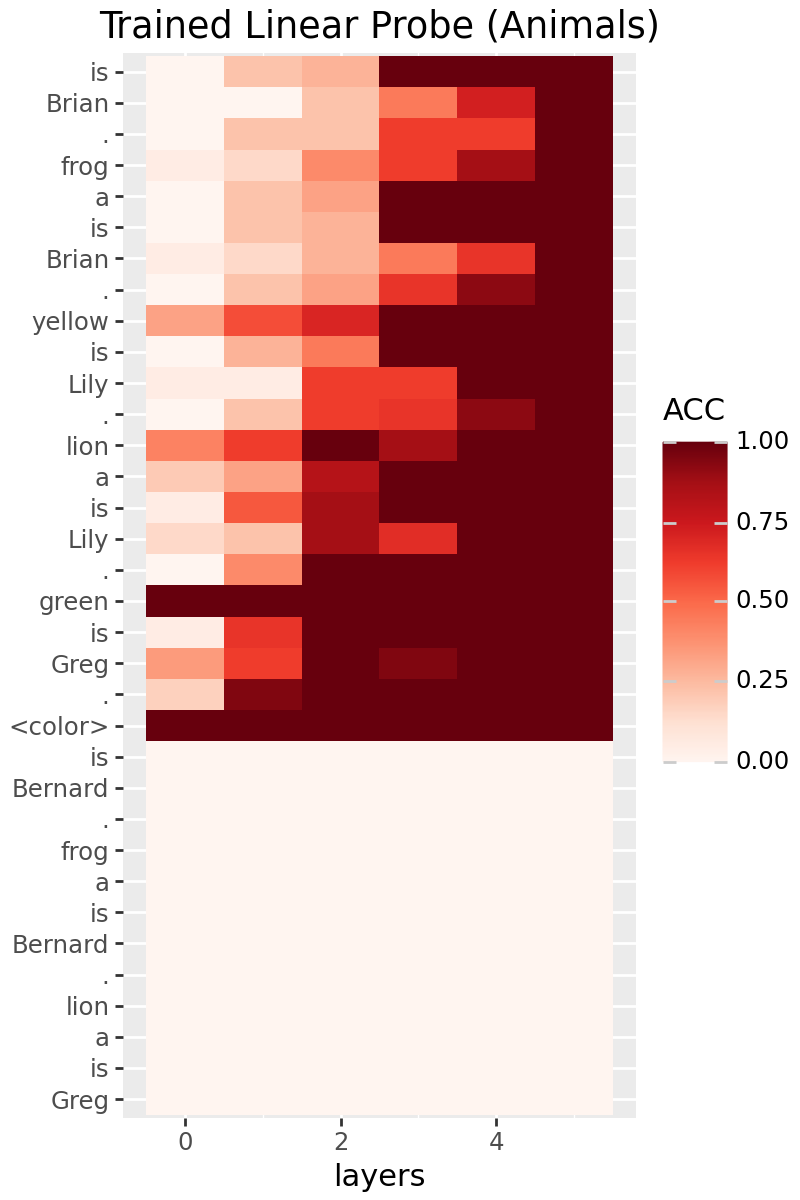

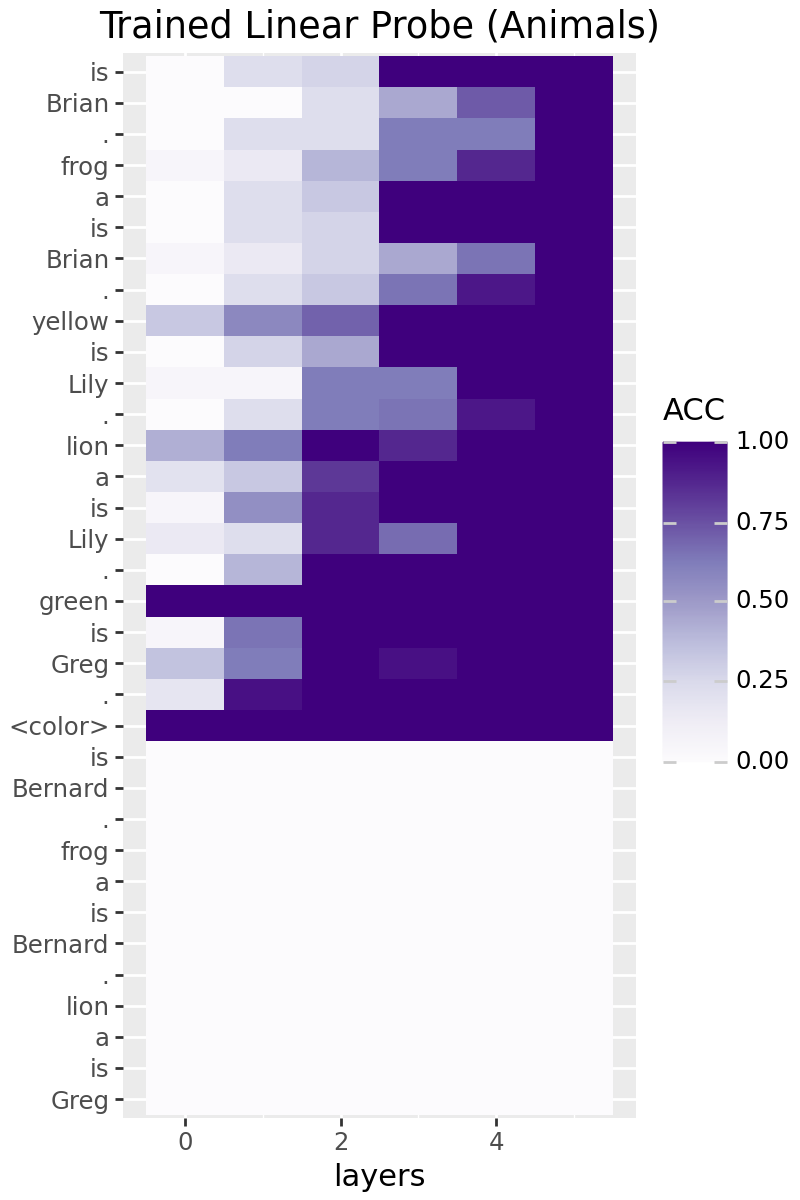

In [ ]:
custom_labels = ['Greg', 'is', 'a', 'lion', '.', 'Bernard', 'is', 'a', 'frog', '.', 'Bernard', 'is', '<color>', '.', 'Greg', 'is', 'green', '.', 'Lily', 'is', 'a', 'lion', '.', 'Lily', 'is', 'yellow', '.', 'Brian', 'is', 'a', 'frog', '.', 'Brian', 'is']
plot_results(pd.read_csv("/content/pyvene_gender_probe-color-pythia70M.csv"), "Animals", custom_labels)